# Multimodality with Gemini 2.0: Process text, audio, images, videos, and PDFs

<a target="_blank" href="https://colab.research.google.com/github/patrickloeber/genai-tutorials/blob/main/notebooks/gemini-multimodal.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[Gemini 2.0 Flash](https://ai.google.dev/gemini-api/docs/models/gemini#gemini-2.0-flash) is extremely good (and fast!) at processing and understanding different file types. Learn how easy it is to use Gemini 2.0 Flash with text, audio, images, videos, and PDFs.

TLDR: This is almost all the Python code you need:

```python
from google import genai

client = genai.Client()

uploaded_file = client.files.upload(file='sample.mp3')  # .wav, .jpg, .mp4, .pdf...

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=[
      'Describe the <image/audio/video/PDF>',
      uploaded_file,
  ]
)
```

For small files, you don't even need the separate `upload`() step and can instead add the file directly. Let's look at some examples for the different file types.

## Get Started with Gemini 2.0

To get started, install the [google-genai](https://github.com/googleapis/python-genai) Python SDK and obtain a [free API key](https://aistudio.google.com/app/apikey) in AI Studio.



In [ ]:
%pip install -U -q google-genai

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

Next, set up the client using the following code:

In [38]:
from google import genai

client = genai.Client(api_key=GOOGLE_API_KEY)

## Text

The following code shows how to use Gemini 2.0 Flash with a simple text prompt:

In [ ]:
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="What's the largest planet in our solar system?"
)

print(response.text)

The largest planet in our solar system is **Jupiter**.



## Audio

You can use Gemini 2.0 Flash to process audio files. For example, you can use it to generate a transcript of an audio file or to summarize the content of an audio file.

In [ ]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/Apollo-11_Day-01-Highlights-10s.mp3"
!wget -q $URL -O sample.mp3

In [48]:
import IPython
IPython.display.Audio("sample.mp3")

For files below 20 MB, you can provide the audio file directly as inline data in your request.

To do this, use `types.Part.from_bytes` and add it to the `contents` argument when calling `generate_content()`:

In [47]:
from google.genai import types

with open('sample.mp3', 'rb') as f:
    image_bytes = f.read()

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents=[
    'Describe this audio clip',
    types.Part.from_bytes(data=image_bytes, mime_type='audio/mp3')
  ]
)

print(response.text)

The audio clip appears to be a recording of a countdown, possibly for a rocket launch or similar event. We hear numbers being counted down from 10 to 8, followed by confirmation of "go for main engine start" and then "main engine start". The overall tone suggests anticipation and excitement related to a launch sequence.



For larger files, you can use the [File API](https://ai.google.dev/api/files) and call `client.files.upload(file=)` to uload the file:

In [ ]:
uploaded_audio_file = client.files.upload(file='sample.mp3')

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents=[
    'Listen carefully to the following audio file. Provide a brief summary.',
    uploaded_audio_file,
  ]
)

print(response.text)

The audio describes a countdown sequence, likely for a rocket launch or similar event. It includes numbers decreasing from ten, followed by "main engine start," indicating the initiation of the vehicle's engines.



Other useful prompts you can try with audio files:
- Create a transcript: `Generate a transcript of the speech.`
- Refer to timestamps: `Provide a transcript of the speech from 02:30 to 03:29.`

## Images

For images, it works the same way.

In [ ]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1582k  100 1582k    0     0  8124k      0 --:--:-- --:--:-- --:--:-- 8154k


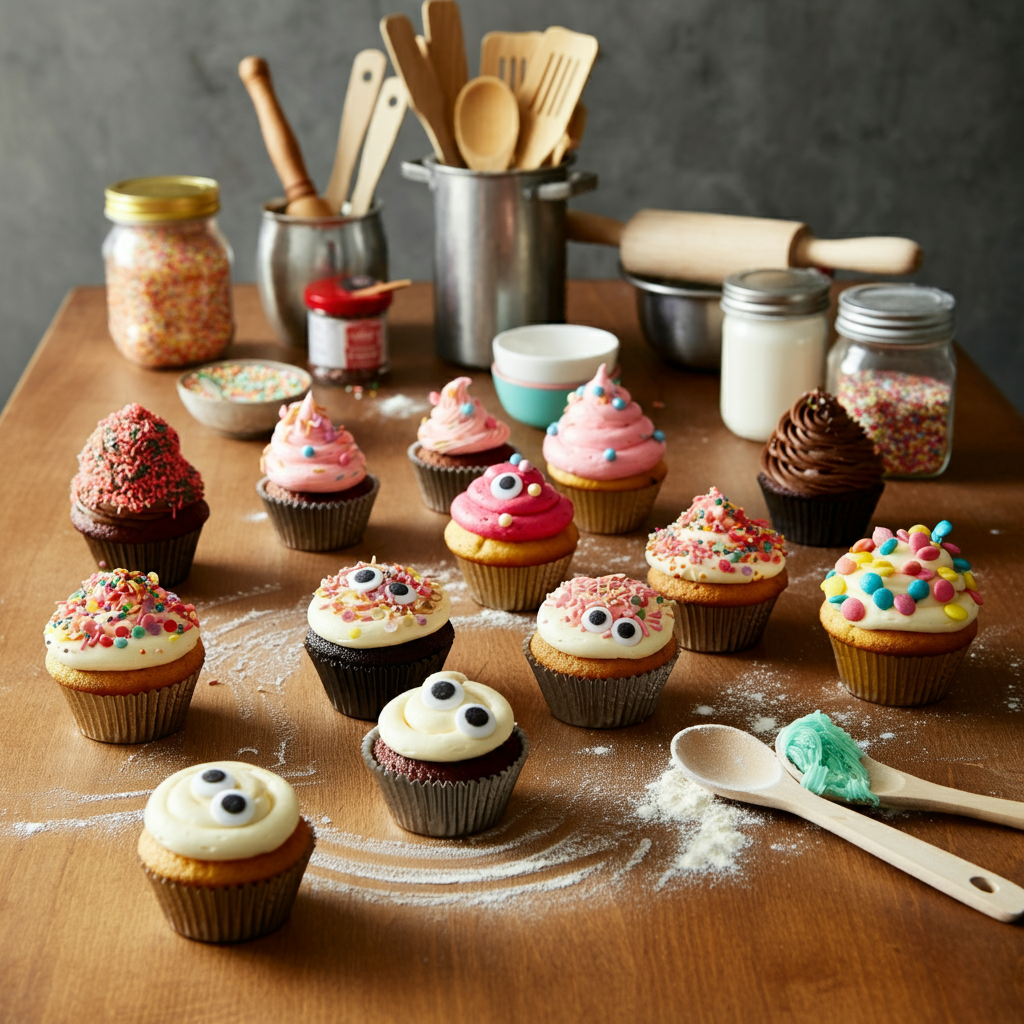

In [ ]:
from IPython.display import Image
Image("image.jpg")

For a total payload size of less than 20MB, you can directly upload locally stored image files or use base64 encoded images:

In [46]:
# Directly upload a Pillow image
import PIL.Image
image = PIL.Image.open("image.jpg")

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["What do you see in this image?", image]
)
print(response.text)

# Upload a base64 encoded image:
import requests
from google.genai import types
image_path = "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg"
image = requests.get(image_path)
image = types.Part.from_bytes(data=image.content, mime_type="image/jpeg")

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["Describe this image in one sentence", image])

print(response.text)

The image shows a delightful scene of baking and cupcake decorating. A wooden table is covered with various cupcakes, some decorated with colorful sprinkles and others with whimsical googly eyes. The cupcakes have a variety of frosting colors, including pink, red, white, and chocolate. Scattered around the cupcakes are wooden spoons with swirls of turquoise frosting, along with a dusting of flour.

In the background, there are jars filled with sprinkles, a container of utensils (spatulas, spoons), a rolling pin, and other baking paraphernalia. The overall composition suggests a fun and creative baking project, perhaps with a playful or monster-themed element.

A variety of cupcakes with different frostings and toppings, including sprinkles and googly eyes, are displayed on a wooden table with baking utensils and ingredients in the background.



For larger files you can again use the File API:

In [ ]:
uploaded_image = client.files.upload(file='image.jpg')

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents=[
    'Describe the image in one sentence.',
    uploaded_image,
  ]
)

print(response.text)

A collection of colorful and decorated cupcakes sits on a wooden table amidst baking supplies.



## PDFs

PDFs can also be used in the same way:

In [ ]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/pdf_structured_outputs/invoice.pdf"
!wget -q $URL -O invoice.pdf

In [ ]:
uploaded_pdf = client.files.upload(file='invoice.pdf')

response = client.models.generate_content(
  model='gemini-2.0-flash',
  contents=[
    'Extract the date of the invoice and the total cost',
    uploaded_pdf,
  ]
)

print(response.text)

Here are the extracted values:
*   **Date of Invoice:** 10/09/2012
*   **Total Cost:** $ 544,46


**Next step**: A cool feature I recommend is to combine it with structured outputs using Pydantic. Learn more in this great blog post from Philipp Schmid: [From PDFs to Insights](https://www.philschmid.de/gemini-pdf-to-data).

## Videos

And lastly, we can also use the same code to analyze videos. Here, we write a small helper function to check if the video is processed successfully after uploading:

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/videos/post_its.mp4 -O Post_its.mp4 -q

In [ ]:
import time

def upload_video(video_file_name):
  video_file = client.files.upload(file=video_file_name)

  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name)

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)

  print(f'Video processing complete: ' + video_file.uri)
  return video_file

post_its_video = upload_video('Post_its.mp4')

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/y474y4cwbzlv


In [ ]:
response = client.models.generate_content(
    model='gemini-2.0-flash',
    contents=[
        post_its_video,
        'Detect all sticky notes and list the names on the notes',
    ]
)

print(response.text)

Here are the names written on the sticky notes:

*   Convergence
*   Lunar Eclipse
*   Canis Major
*   Leo Minor
*   Andromeda's Reach
*   Stellar Nexus
*   Orion's Belt
*   Lyra
*   Bayes Theorem
*   Chaos Theory
*   Riemann's Hypothesis
*   Sagitta
*   Pandora's Box
*   Celestial Drift
*   Comet's Tail
*   Serpens
*   Centaurus
*   Symmetry
*   Fractal
*   Taylor Series
*   Stokes Theorem
*   Chaos Field
*   Supernova Echo
*   Astral Forge
*   Draco
*   Delphinus
*   Lynx
*   Persius Shield
*   Equilibrium
*   Golden Ratio
*   Infinity Loop
*   Medusa
*   Athena's Eye
*   Hera
*   Prometheus Rising
*   Chimera Dream
*   Zephyr
*   Euler's Path
*   Echo
*   Athena
*   Cerberus
*   Galactic Core
*   Titan
*   Odin
*   Aether
*   Phoenix
*   Vector
*   Orion's Sword


## Conclusion

Gemini 2.0's multimodal capabilities are powerful, and with the Python SDK you only need a few lines of code to process various media types, including text, audio, images, videos, and PDFs.

More helpful resources:

- [API docs quickstart](https://ai.google.dev/gemini-api/docs/quickstart?lang=python)
- [Audio understanding docs](https://ai.google.dev/gemini-api/docs/audio?lang=python)
- [Explore Gemini's vision capabilities](https://ai.google.dev/gemini-api/docs/vision?lang=python)
- [Philschmid blog post: From PDFs to Insights](https://www.philschmid.de/gemini-pdf-to-data)
- [Video understanding cookbook](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Video_understanding.ipynb)
